In [1]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline

In [2]:
df = pd.read_csv('QRdummydata.csv')
df = df.drop(columns = "Unnamed: 0")
df

,HSG,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,...,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,3,770,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,680,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4,730,0.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,790,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,800,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3,770,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1236,4,750,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,4,780,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1238,3,800,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['IndGrd'], axis=1)
X = X1.values
y = df['IndGrd'].values #IndGrd is our predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [5]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7903225806451613


In [6]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [8]:
from matplotlib import pyplot,pylab
matplotlib.use('Agg')
clf.fit(X, y)
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
pyplot.savefig('foo.png')

Feature: 0, Score: 0.06638
Feature: 1, Score: 0.24557
Feature: 2, Score: 0.01945
Feature: 3, Score: 0.01893
Feature: 4, Score: 0.01971
Feature: 5, Score: 0.01394
Feature: 6, Score: 0.01638
Feature: 7, Score: 0.01382
Feature: 8, Score: 0.03479
Feature: 9, Score: 0.02030
Feature: 10, Score: 0.02263
Feature: 11, Score: 0.01544
Feature: 12, Score: 0.01489
Feature: 13, Score: 0.02549
Feature: 14, Score: 0.01667
Feature: 15, Score: 0.01855
Feature: 16, Score: 0.00612
Feature: 17, Score: 0.01819
Feature: 18, Score: 0.01480
Feature: 19, Score: 0.01898
Feature: 20, Score: 0.00801
Feature: 21, Score: 0.02470
Feature: 22, Score: 0.02085
Feature: 23, Score: 0.02076
Feature: 24, Score: 0.00927
Feature: 25, Score: 0.00324
Feature: 26, Score: 0.00854
Feature: 27, Score: 0.01435
Feature: 28, Score: 0.02248
Feature: 29, Score: 0.02093
Feature: 30, Score: 0.01380
Feature: 31, Score: 0.01627
Feature: 32, Score: 0.00687
Feature: 33, Score: 0.00751
Feature: 34, Score: 0.00885
Feature: 35, Score: 0.01937
Fe

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

1     0.245572
0     0.066384
8     0.034793
41    0.027383
13    0.025486
21    0.024696
10    0.022631
28    0.022479
37    0.022214
29    0.020930
22    0.020847
23    0.020761
39    0.020657
9     0.020296
4     0.019710
2     0.019446
35    0.019369
19    0.018976
3     0.018934
38    0.018746
15    0.018548
17    0.018189
40    0.016825
14    0.016675
6     0.016384
31    0.016273
11    0.015438
12    0.014887
36    0.014809
18    0.014801
27    0.014354
5     0.013942
7     0.013817
30    0.013803
42    0.012534
24    0.009269
34    0.008854
26    0.008542
20    0.008007
33    0.007508
32    0.006867
16    0.006120
25    0.003242
dtype: float64

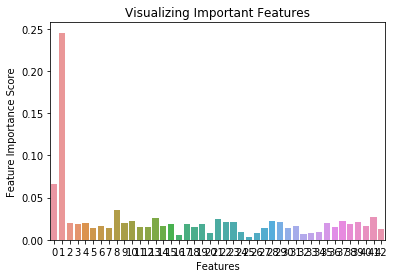

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(y=feature_imp,x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()
plt.savefig('FI.png')

In [11]:
feature_imp = pd.Series(clf.feature_importances_, index= list(X1.columns.values)).sort_values(ascending=False)
feature_imp

SAT                                                         0.245572
HSG                                                         0.066384
Region_Singapore                                            0.034793
AC2_Undeclared                                              0.027383
AC1_Economics                                               0.025486
AC1_Philosophy, Politics and Economics                      0.024696
Region_Southeast Asia                                       0.022631
AC2_Arts & Humanities                                       0.022479
AC2_Philosophy, Politics and Economics                      0.022214
AC2_Economics                                               0.020930
AC1_Physical Sciences                                       0.020847
AC1_Psychology                                              0.020761
AC2_Psychology                                              0.020657
Region_South Asia                                           0.020296
Region_East Asia                  

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

Feature ranking:
1. feature 1 (0.257898)
2. feature 0 (0.079290)
3. feature 8 (0.030679)
4. feature 21 (0.024278)
5. feature 13 (0.023724)
6. feature 10 (0.022907)
7. feature 28 (0.022766)
8. feature 41 (0.022270)
9. feature 9 (0.021890)
10. feature 17 (0.021311)
11. feature 23 (0.021095)
12. feature 4 (0.021058)
13. feature 22 (0.020177)
14. feature 37 (0.019719)
15. feature 29 (0.019640)
16. feature 40 (0.019062)
17. feature 39 (0.018999)
18. feature 35 (0.017471)
19. feature 38 (0.017298)
20. feature 3 (0.017228)
21. feature 6 (0.016849)
22. feature 2 (0.016599)
23. feature 14 (0.016560)
24. feature 19 (0.016312)
25. feature 7 (0.015947)
26. feature 15 (0.015676)
27. feature 11 (0.014498)
28. feature 36 (0.014361)
29. feature 31 (0.014276)
30. feature 18 (0.014241)
31. feature 27 (0.014206)
32. feature 30 (0.014079)
33. feature 5 (0.013968)
34. feature 12 (0.013822)
35. feature 42 (0.011085)
36. feature 24 (0.010009)
37. feature 33 (0.009280)
38. feature 34 (0.008470)
39. feature 26

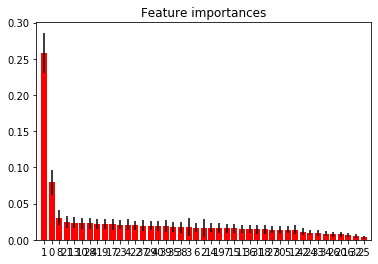

In [13]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()